## Linear Regression Intuition
Before we dive into the actual technique of Linear Regression, lets look at some intuition of it.

Let’s say, I give you the following puzzle:

Given the following values of X and Y, what is the value of Y when X = 5.

**(1, 1), (2, 2), (4, 4), (100, 100), (20, 20)**

The answer is : 5. Not very difficult, right?
<hr>

Now, let’s take a look at different example. Say you have the following pairs of X and Y. Can you calculate the value of Y, when X = 5?

**(1, 1), (2, 4), (4, 16), (100, 10000), (20, 400)**

The answer is : 25. Was it difficult?
<hr>

Let’s understand a bit as to what happened in the above examples. 

When we look at the first example, after looking at the given pairs, one can establish that the relationship between X and Y is $Y = X$. 

Similarly, in the second example, the relationship is $Y = X*X = X^2$.

In these two examples, we can determine the relationship between two given variables (X and Y) because we could easily identify the relationship between them. Overall, machine learning works in the same way.

Your computer looks at some examples and then tries to identify “the most suitable” relationship between the sets X and Y. Using this identified relationship, it will try to predict (or more) for new examples for which you don’t know Y.

Keeping the above idea in mind, I will try to explain what is linear regression.

## Define Regression
Regression is usually termed as determining relationship(s) between two or more variables. 

For example, in the above two examples, X and Y are the variables. **X** is termed as the **independent variable** and **Y** is termed as the **dependent variable** (because its value is calculated using X).
Also, Y has a continous range (unlike classification where Y is discrete).


## Linear Regression/ Simple Linear Regression
Simple Linear Regression (SLR) is termed as simple because there is only one independent variable.

Suppose we have a dataset which contains information about relationship between 'Years of experience' and 'Salary' in a particular work field.

The **dependent variable could represent salary**. You could assume that level of experience will impact salary. So, you would label the **independent variable as experience**.

Representing the experience with variable x and  salary with y, we can say that y ∝ x. ( y is proportional to x).

However, a change in x does not usually mean an equal change in y.

The **coefficient** can be thought of as a **multiplier that connects the independent and dependent variables.** It translates how much y will be affected by a unit change in x. 

Let's add a coefficient b1 to our example.

We thus get $y = b_1*x$

Now the salaries in a particular job always start with the base amount or the lowest possible salary. We thus need to take that constant in consideration. 

The constant b0 would be the starting salary for someone with a zero level of experience. Assuming every fresher in the company gets 30K as starting salary we can set it as the base price.

Finally, we have:

$Salary = b_0 + b_1 * Experience$

or

$y = b_0 + b_1*x$

This is similar to the equation of a straight line y= m*x +c

![Equation](https://miro.medium.com/max/1400/1*MgZkzHNM6lNTtrfhV6SRcA.png)

Let's bring our theory into practice now!

## Objective
The objective is to use linear regression to understand how years of experience impact Salary.

In [15]:
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise

In [16]:
#Loading the salary dataset
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Linear_Regression_Introduction/master/Salary_Data.csv')

In [17]:
#Let's have a look at what our data is like
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [18]:
#Let’s explore the data a little bit by checking the number of rows and columns in our datasets.
data.shape

(30, 2)

This means the data contains 30 rows and 2 columns.

## Plotting the Data

Let’s plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

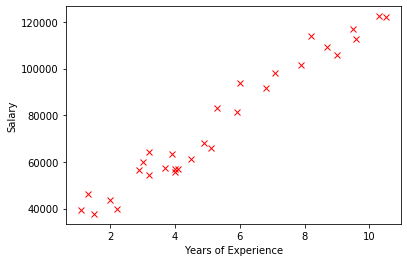

In [19]:
# Scatter plot helps in visualising the data distribution
plt.plot(data.YearsExperience, data.Salary,'rx')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

As you can see, there is a clear relationship between the years of experience and salary.

Our next step is to divide the data into “attributes” and “labels” or as you've already known as input and target variables.

In our dataset, we only have two columns. We want to predict the Salary depending upon the Years of Experience recorded. Therefore our attribute set will consist of the “YearsExperience” column which is stored in the X variable, and the label will be the “Salary” column which is stored in y variable.

**NOTE:** You need to reshape your data if only one feature using reshape(-1,1)

In [29]:
# Reshaping the data into a 2D array as required by the LinearRegressor 
# When we specify -1 along with 1 as the argument, the dimension is automatically calculated.
X = data['YearsExperience'].values.reshape(-1,1)
y = data['Salary'].values.reshape(-1,1)

Now, the shapes of X and y are as follows:

In [30]:
print(X.shape)
print(y.shape)

(30, 1)
(30, 1)


Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

In [31]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that "best fits" the data points.It’s impossible to connect all the marks with a straight line, so you use a best fitting line. 

The equation for this line would be the result of your simple linear regression(Remember the equation y= b0 + b1*x that we just derived?). The regression finds the best fitting line. 

This line is your **regression model**.

To perform Linear Regression quickly, we will be using the library scikit-learn. If you don’t have it already you can install it using pip:


```
pip install scikit-learn 
```



After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class and call the fit() method along with our training data.


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train) #training the algorithm  # perform linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the salaries. To make predictions on the test data, execute the following script:

In [11]:
y_pred = linear_regressor.predict(X_test)  # make predictions

We have our predictions in y_pred. Now lets visualize the data set and the regression line with the test data:

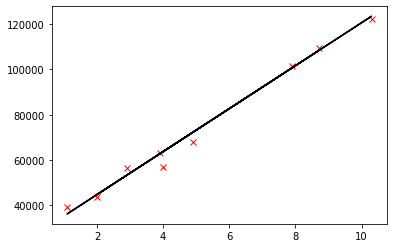

In [12]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

As you can see, the algorithm has drawn a line that passes through the maximum test data points and has the minimum distance from the others. This line is known as the "best-fit" or the regression line. 

Since this line has a positive slope, we can say that the salary increases as no. of years of experience increase.

![Simple Linear Regression](https://i0.wp.com/brokerstir.com/wp-content/uploads/2018/03/simple_linear_2.png)

Using this line, you can even compute the salaries for the years of experience not present in the dataset by finding the corresponding value of y on the line.

![Prediction](https://miro.medium.com/max/1400/1*ANtsE4kMZDAqueFPVk1jmg.jpeg)


Congratulations! You've successfully completed your objective and created your own Linear Regression model.

In our future sessions we'll learn how to optimise our models.